# Water Quality and Potability

This model is a binary classifier built on a neural network architecture, aimed to predict water potability based on various water quality parameters.

The dataset can be found [here](https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability?select=water_potability.csv)


This specific model uses **Dropout** as the primary regularization technique and **RMSprop** as the optimizer

#### Importing the necessary libraries and load the data

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras

In [3]:
# Load the data
data = pd.read_csv(r'C:\Users\user\water_potability\water_potability.csv')
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


#### Data Preprocessing
- The dataset has missing values indicated by (NaN). Median imputation was used
- The features also need to be scaled down. Normalizing using MinMax scaler was applied
- The dataset is split into a training set carrying 70%, a validation set (15%), and a test set (15%)

In [4]:
# Handle missing values with median imputation
data = data.fillna(data.median())

# split features and target
X = data.drop('Potability', axis=1)
y = data['Potability']

# scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# split into train-70, validation-15, test-15
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

#### Model Architecture



This is a 4-layer feedforward neural network with **Dropout** for regularization

- **ReLU** activation is used in each hidden layer
- **Sigmoid** activation is used in the output layer 

It is using **RMSprop** with a **learning rate of 0.0005**

- For loss & metrics; **binary crossentropy** as the loss function, and **accuracy** as the evaluation metric


In [11]:
model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(9,)),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(16, activation='relu'),
        keras.layers.Dropout(0.1),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    
optimizer = keras.optimizers.RMSprop(learning_rate=0.0005)
model.compile(optimizer=optimizer,
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
    

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Training

In [12]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=31,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5776 - loss: 0.6823 - val_accuracy: 0.6314 - val_loss: 0.6615
Epoch 2/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5968 - loss: 0.6767 - val_accuracy: 0.6314 - val_loss: 0.6616
Epoch 3/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6135 - loss: 0.6709 - val_accuracy: 0.6314 - val_loss: 0.6612
Epoch 4/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5983 - loss: 0.6747 - val_accuracy: 0.6314 - val_loss: 0.6613
Epoch 5/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6011 - loss: 0.6730 - val_accuracy: 0.6314 - val_loss: 0.6612
Epoch 6/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5969 - loss: 0.6738 - val_accuracy: 0.6314 - val_loss: 0.6614
Epoch 7/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5999 - loss: 0.6736 - val_accuracy: 0.6314 - val_loss: 0.6620
Epoch 8/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5848 - loss: 0.6766 - val_accuracy: 0.6314 - 

#### Predictions & Performance

In [13]:
# Predictions
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Performance Report
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
              precision    recall  f1-score   support

           0       0.62      1.00      0.77       307
           1       0.00      0.00      0.00       185

    accuracy                           0.62       492
   macro avg       0.31      0.50      0.38       492
weighted avg       0.39      0.62      0.48       492

[[307   0]
 [185   0]]


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

**Confusion Matrix and Overall report**

This model is predicting everything as Class 0, it never predicts Class 1 (potable) at all

The accuracy of 62% may be because it is only predicting the majority class (0)

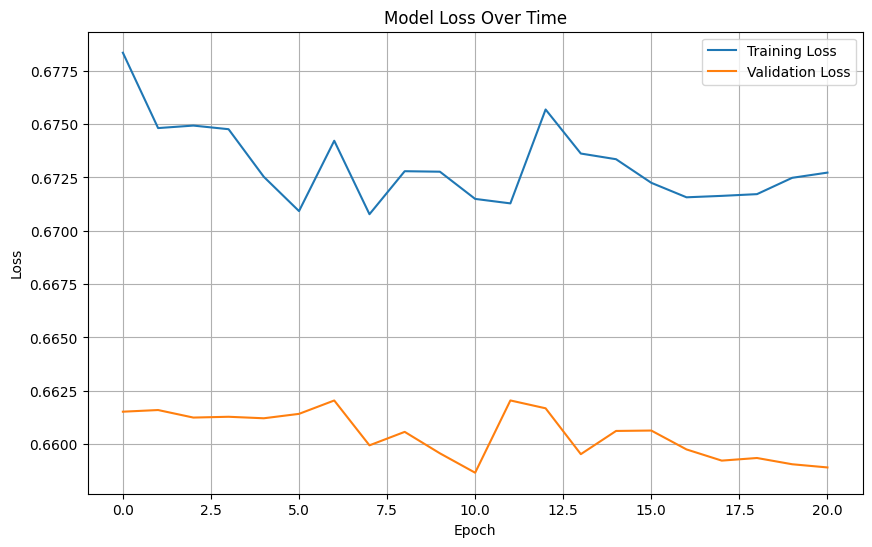

In [14]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


## Instance 2
- add neurons
- lower threshold from 0.5 to 0.4

In [15]:
model = keras.Sequential([
        keras.layers.Dense(128, activation='relu', input_shape=(9,)),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.1),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    
optimizer = keras.optimizers.RMSprop(learning_rate=0.0005)
model.compile(optimizer=optimizer,
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
    

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=31,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6016 - loss: 0.6770 - val_accuracy: 0.6314 - val_loss: 0.6637
Epoch 2/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5995 - loss: 0.6741 - val_accuracy: 0.6314 - val_loss: 0.6633
Epoch 3/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5944 - loss: 0.6757 - val_accuracy: 0.6314 - val_loss: 0.6604
Epoch 4/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6043 - loss: 0.6723 - val_accuracy: 0.6314 - val_loss: 0.6611
Epoch 5/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6071 - loss: 0.6716 - val_accuracy: 0.6314 - val_loss: 0.6582
Epoch 6/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5922 - loss: 0.6780 - val_accuracy: 0.6314 - val_loss: 0.6590
Epoch 7/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6011 - loss: 0.6761 - val_accuracy: 0.6314 - val_loss: 0.6611
Epoch 8/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6165 - loss: 0.6664 - val_accuracy: 0.6314 - 

#### Prediction and Performance Report

In [17]:
# Predictions
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Performance Report
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
              precision    recall  f1-score   support

           0       0.70      0.85      0.77       307
           1       0.61      0.39      0.48       185

    accuracy                           0.68       492
   macro avg       0.66      0.62      0.62       492
weighted avg       0.67      0.68      0.66       492

[[261  46]
 [112  73]]


**Iteration 2 Progress**

- More balanced accuracy (68%)
- Better model learning (lower loss: ~.59)
- Class 1 (portable) is finally being predicted

**issues**

- recall for Class 1 is till low (0.39) - model is still missing too many potable water samples
- more false negatives - 112 potable samples misclassified as non-potable


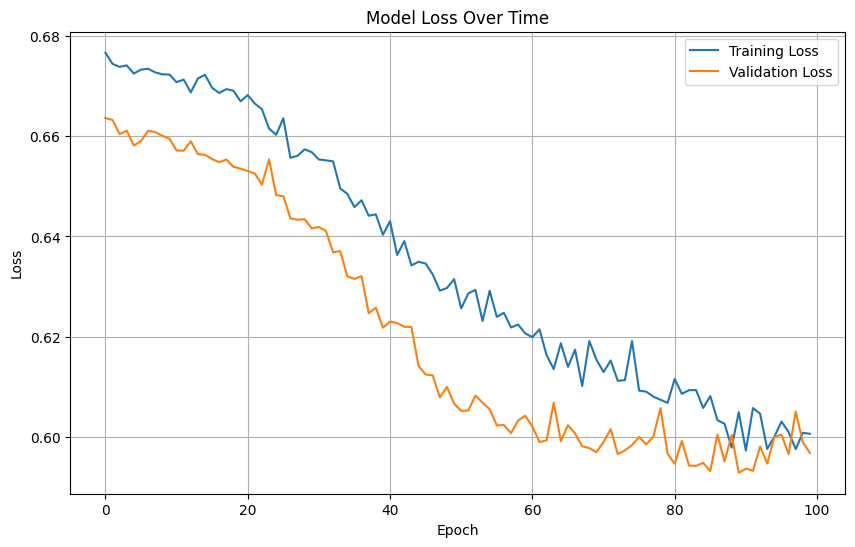

In [18]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

## Instance 3
- lower threshold to 0.4
- add class weights to force model to care about class 1

In [19]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
class_weights = {0: 1, 1: 2} # double the weight for class 1

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=31,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],
    class_weight=class_weights,
    verbose=1
)

Epoch 1/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6453 - loss: 0.8721 - val_accuracy: 0.6191 - val_loss: 0.6520
Epoch 2/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6186 - loss: 0.8673 - val_accuracy: 0.5845 - val_loss: 0.6697
Epoch 3/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5952 - loss: 0.8709 - val_accuracy: 0.5927 - val_loss: 0.6602
Epoch 4/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6084 - loss: 0.8759 - val_accuracy: 0.6171 - val_loss: 0.6423
Epoch 5/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6417 - loss: 0.8472 - val_accuracy: 0.5703 - val_loss: 0.6711
Epoch 6/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5881 - loss: 0.8534 - val_accuracy: 0.6069 - val_loss: 0.6550
Epoch 7/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6094 - loss: 0.8586 - val_accuracy: 0.6456 - val_loss: 0.6281
Epoch 8/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6266 - loss: 0.8466 - val_accuracy: 0.5947 - v

In [20]:
# Predictions
y_pred = (model.predict(X_test) > 0.4).astype(int)

# Performance Report
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
              precision    recall  f1-score   support

           0       0.79      0.37      0.51       307
           1       0.45      0.84      0.58       185

    accuracy                           0.55       492
   macro avg       0.62      0.60      0.54       492
weighted avg       0.66      0.55      0.53       492

[[114 193]
 [ 30 155]]


**Iteration 3**
- class 1 recall jumped to 0.84
- more potable water samples is being identified (155/185 instead of ~70 before)

**issues**
- precision for class 0 dropped
- overall accuracy dropped to 55%
- 193 class 0s were missclassified; model overcompensating for class 1

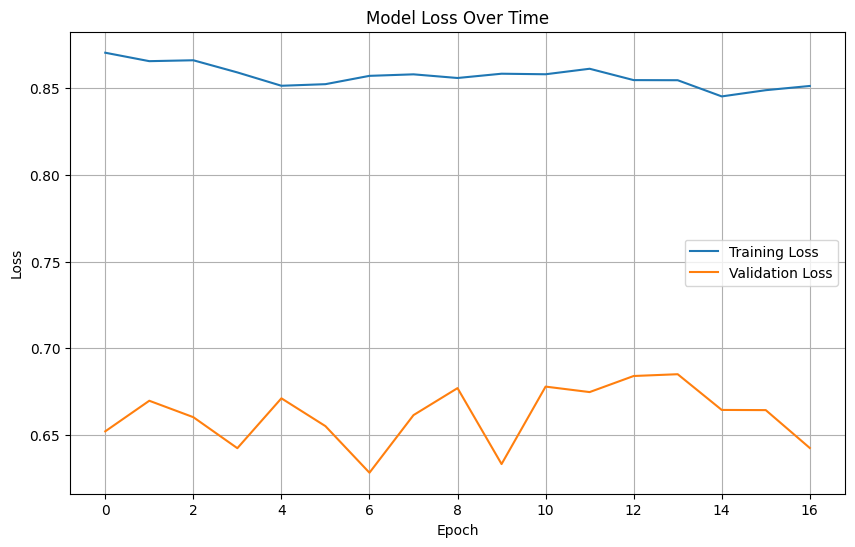

In [21]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

## Instance 4
- slightly increase threshold
- reduce class 1 weight to 1.2

In [24]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
class_weights = {0: 1, 1: 1.2} # adjust the weight for class 1

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=31,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],
    class_weight=class_weights,
    verbose=1
)

Epoch 1/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6650 - loss: 0.6721 - val_accuracy: 0.6802 - val_loss: 0.6013
Epoch 2/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6859 - loss: 0.6614 - val_accuracy: 0.6701 - val_loss: 0.6055
Epoch 3/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6644 - loss: 0.6798 - val_accuracy: 0.6762 - val_loss: 0.5993
Epoch 4/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6903 - loss: 0.6483 - val_accuracy: 0.6782 - val_loss: 0.6058
Epoch 5/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6873 - loss: 0.6597 - val_accuracy: 0.6741 - val_loss: 0.6010
Epoch 6/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6878 - loss: 0.6481 - val_accuracy: 0.6517 - val_loss: 0.6170
Epoch 7/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6789 - loss: 0.6516 - val_accuracy: 0.6782 - val_loss: 0.6016
Epoch 8/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6659 - loss: 0.6691 - val_accuracy: 0.6762 - v

In [25]:
# Predictions
y_pred = (model.predict(X_test) > 0.45).astype(int)

# Performance Report
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
              precision    recall  f1-score   support

           0       0.71      0.76      0.74       307
           1       0.55      0.49      0.52       185

    accuracy                           0.66       492
   macro avg       0.63      0.63      0.63       492
weighted avg       0.65      0.66      0.66       492

[[234  73]
 [ 94  91]]
